In [1]:
import json
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
def plot_noise_from_file(filename):
    # Load JSON data from file
    with open(filename, 'r') as f:
        raw_data = json.load(f)

    # Parse nested JSON string inside 'historyJson'
    nested = json.loads(raw_data["historyJson"])

    # Extract and convert sample data safely (skip empty strings)
    samples = [float(s) for s in nested["storageVolume"].split(";") if s.strip()]

    # Timing info
    start_ms = nested["startTime"]
    duration_ms = nested["duration"]
    sample_count = len(samples)
    interval_ms = duration_ms / sample_count

    # Generate timestamps for x-axis
    timestamps = [
        datetime.fromtimestamp(start_ms / 1000.0) + timedelta(milliseconds=i * interval_ms)
        for i in range(sample_count)
    ]

    # Plotting
    plt.figure(figsize=(14, 5))
    plt.plot(timestamps, samples, linewidth=0.8)
    plt.title("Noise Levels Over Time")
    plt.xlabel("Time")
    plt.ylabel("dB (decibels)")
    plt.ylim(30,70)
    plt.grid(True)
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()


July 26th, 2025


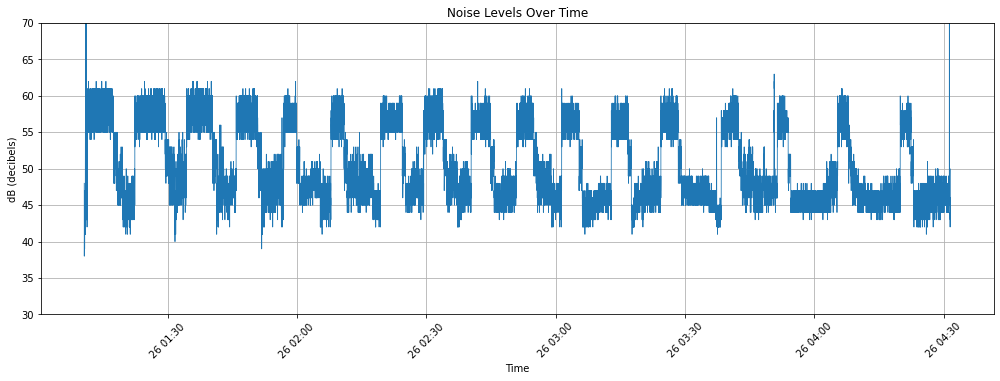

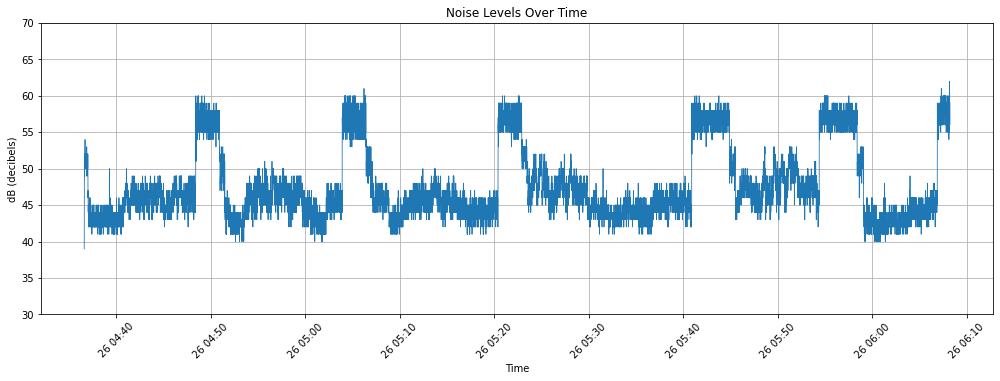

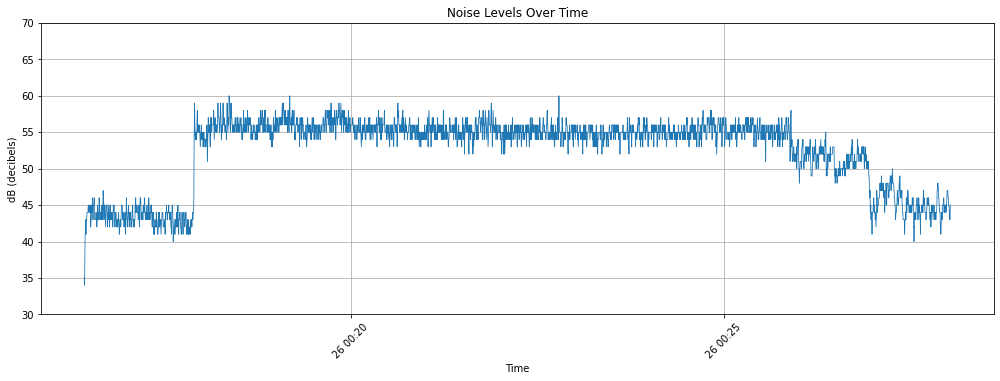

In [3]:
print('\nJuly 26th, 2025')
plot_noise_from_file('history1.json')
plot_noise_from_file('history0.json')
plot_noise_from_file('history2.json')